<a href="https://colab.research.google.com/github/hilya09/phishing-detection/blob/main/Train_model_eksperimen_lebih_1_Variabel_Kombinasi_Dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import gdown
import zipfile
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

# Download dataset

##dataset lama

In [ ]:
# Create the directory if it doesn't exist
os.makedirs('/content/dataset-phishing/', exist_ok=True)

In [ ]:
# Download the file
!wget -O /content/dataset-phishing/urldataset.zip https://github.com/hilya09/dataset/raw/main/urldataset.zip

--2024-05-06 14:37:19--  https://github.com/hilya09/dataset/raw/main/urldataset.zip
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hilya09/dataset/main/urldataset.zip [following]
--2024-05-06 14:37:19--  https://raw.githubusercontent.com/hilya09/dataset/main/urldataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11685834 (11M) [application/zip]
Saving to: ‘/content/dataset-phishing/urldataset.zip’

/content/dataset-ph 100%[===================>]  11.14M  --.-KB/s    in 0.07s   

2024-05-06 14:37:20 (165 MB/s) - ‘/content/dataset-phishing/urldataset.zip’ saved [11685834/11685834]



In [ ]:
# Extract the contents of the zip file
with zipfile.ZipFile('/content/dataset-phishing/urldataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/train-model/phishing/')

In [ ]:
data = pd.read_csv("/content/train-model/phishing/urldataset.csv")

##dataset UCI ML

In [ ]:
gdown.download_folder("https://drive.google.com/drive/folders/1B4N-h31TXwSIumPu0SJBYTQTQcmakwtX")

Retrieving folder contents


Processing file 130fxYjT4dOlaDd2Hd424Hk1EO8EQFdVB Detection.zip
Processing file 1RG81re2Pd1ujZFXZt8r5upWNaipXZ5Jv malicious_pish.zip
Processing file 1bwBqPpcrR06U-kTc18h4ZCGNQu1xJKCT phishing_site_urls.zip
Processing file 1bjbIFrWuMZu1RxDjcc3jCxYcR14qMHgo phiusiil+phishing+url+dataset.zip


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=130fxYjT4dOlaDd2Hd424Hk1EO8EQFdVB
To: /content/dataset-phishing/Detection.zip
100%|██████████| 7.78k/7.78k [00:00<00:00, 8.56MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RG81re2Pd1ujZFXZt8r5upWNaipXZ5Jv
To: /content/dataset-phishing/malicious_pish.zip
100%|██████████| 17.7M/17.7M [00:00<00:00, 20.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bwBqPpcrR06U-kTc18h4ZCGNQu1xJKCT
To: /content/dataset-phishing/phishing_site_urls.zip
100%|██████████| 9.33M/9.33M [00:00<00:00, 22.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bjbIFrWuMZu1RxDjcc3jCxYcR14qMHgo
To: /content/dataset-phishing/phiusiil+phishing+url+dataset.zip
100%|██████████| 15.4M/15.4M [00:00<00:00, 55.8MB/s]
Download completed


['/content/dataset-phishing/Detection.zip',
 '/content/dataset-phishing/malicious_pish.zip',
 '/content/dataset-phishing/phishing_site_urls.zip',
 '/content/dataset-phishing/phiusiil+phishing+url+dataset.zip']

In [ ]:
with zipfile.ZipFile('/content/dataset-phishing/phiusiil+phishing+url+dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/train-model/phishing/')

In [ ]:
data2 = pd.read_csv("/content/train-model/phishing/PhiUSIIL_Phishing_URL_Dataset.csv") #dari uci ML repository

# Exploratory Data Analysis (EDA)

##dataset 1

In [ ]:
data

,URL,label
0,signin.eby.de.zukruygxctzmmqi.civpro.co.za,1
1,http://www.marketingbyinternet.com/mo/e56508df...,1
2,https://docs.google.com/spreadsheet/viewform?f...,1
3,retajconsultancy.com,1
4,alexpay2.beget.tech,1
...,...,...
664204,https://en.wikipedia.org/wiki/Smith_%26_Wesson...,0
664205,http://www.thefreedictionary.com/tor,0
664206,http://www.dummies.com/education/math/geometry...,0
664207,http://www.vg247.com/2017/04/24/best-nintendo-...,0


In [ ]:
data= data.rename(columns={'label': 'Label'})

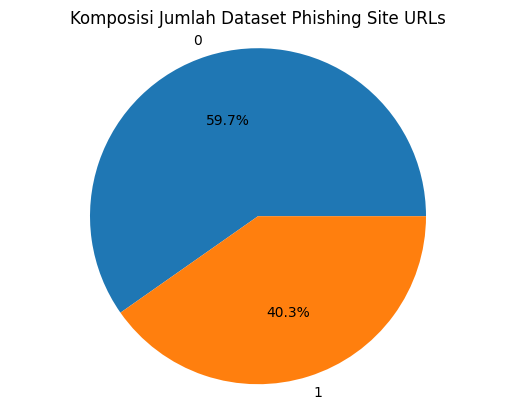

In [ ]:
# Konversi data menjadi DataFrame
df = pd.DataFrame(data, columns=['Label'])

# Hitung jumlah masing-masing label
label_count = df['Label'].value_counts()

# Buat pie chart menggunakan Seaborn
plt.title('Komposisi Jumlah Dataset Phishing Site URLs')
plt.pie(label_count, labels=label_count.index, autopct='%1.1f%%')

# Tampilkan pie chart
plt.axis('equal')
plt.show()

In [ ]:
data['Label'].unique()

array([1, 0])

In [ ]:
print('Total Jumlah url:', data.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [0] Good\t\t:', data[data.Label == 0].shape[0], 'data url')
print('-- [1] Phishing\t\t:', data[data.Label == 1].shape[0], 'data url\n')

Total Jumlah url: 664209 data

terdiri dari (label):
-- [0] Good		: 396766 data url
-- [1] Phishing		: 267443 data url



In [ ]:
data.duplicated().sum()

143

In [ ]:
data.drop(data[data.URL.duplicated() == True].index, axis = 0, inplace = True)
data.reset_index(drop=True)

,URL,Label
0,signin.eby.de.zukruygxctzmmqi.civpro.co.za,1
1,http://www.marketingbyinternet.com/mo/e56508df...,1
2,https://docs.google.com/spreadsheet/viewform?f...,1
3,retajconsultancy.com,1
4,alexpay2.beget.tech,1
...,...,...
617939,https://en.wikipedia.org/wiki/Smith_%26_Wesson...,0
617940,http://www.thefreedictionary.com/tor,0
617941,http://www.dummies.com/education/math/geometry...,0
617942,http://www.vg247.com/2017/04/24/best-nintendo-...,0


In [ ]:
data.isnull().sum()

URL      0
Label    0
dtype: int64

In [ ]:
data.URL.duplicated().sum()

0

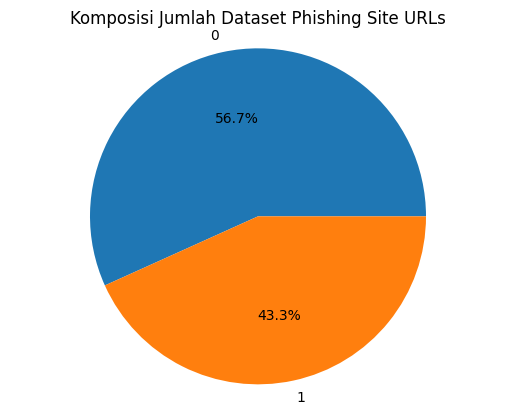

In [ ]:
# Konversi data menjadi DataFrame
df = pd.DataFrame(data, columns=['Label'])

# Hitung jumlah masing-masing label
label_count = df['Label'].value_counts()

# Buat pie chart menggunakan Seaborn
plt.title('Komposisi Jumlah Dataset Phishing Site URLs')
plt.pie(label_count, labels=label_count.index, autopct='%1.1f%%')

# Tampilkan pie chart
plt.axis('equal')
plt.show()

In [ ]:
# Memilih hanya kolom 'url' dan 'label'
data1_new = data[['URL', 'Label']]

In [ ]:
data1_new

,URL,Label
0,signin.eby.de.zukruygxctzmmqi.civpro.co.za,1
1,http://www.marketingbyinternet.com/mo/e56508df...,1
2,https://docs.google.com/spreadsheet/viewform?f...,1
3,retajconsultancy.com,1
4,alexpay2.beget.tech,1
...,...,...
664204,https://en.wikipedia.org/wiki/Smith_%26_Wesson...,0
664205,http://www.thefreedictionary.com/tor,0
664206,http://www.dummies.com/education/math/geometry...,0
664207,http://www.vg247.com/2017/04/24/best-nintendo-...,0


In [ ]:
# data_good = data[data.Label== 0]
# data_phish = data[data.Label== 1]

# # Plotting WordCloud to identify the most frequent words in good url
# phish_url = " ".join(i for i in data_good.URL)
# wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(phish_url)
# plt.figure( figsize=(12,14),facecolor='k')
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.tight_layout(pad=0)
# plt.show()

In [ ]:
# # Plotting WordCloud to identify the most frequent words in phishing url
# phish_url = " ".join(i for i in data_phish.URL)
# wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(phish_url)
# plt.figure( figsize=(12,14),facecolor='k')
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.tight_layout(pad=0)
# plt.show()

##dataset2

In [ ]:
data2

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0


In [ ]:
data2= data2.rename(columns={'label': 'Label'})

In [ ]:
data2['Label'].unique()

array([1, 0])

In [ ]:
print('Total Jumlah url:', data2.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [0] Good\t\t:', data2[data2.Label == 0].shape[0], 'data url')
print('-- [1] Phishing\t\t:', data2[data2.Label == 1].shape[0], 'data url\n')

Total Jumlah url: 235795 data

terdiri dari (label):
-- [0] Good		: 100945 data url
-- [1] Phishing		: 134850 data url



In [ ]:
data2.duplicated().sum()

0

In [ ]:
data2.drop(data2[data2.URL.duplicated() == True].index, axis = 0, inplace = True)
data2.reset_index(drop=True)

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,Label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235365,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235366,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235367,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235368,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0


In [ ]:
data2.isnull().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

In [ ]:
data2.URL.duplicated().sum()

0

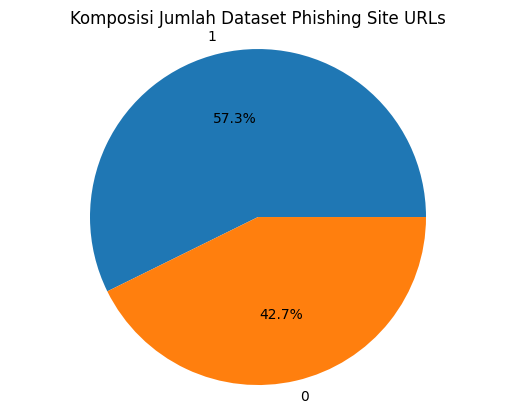

In [ ]:
# Konversi data menjadi DataFrame
df = pd.DataFrame(data2, columns=['Label'])

# Hitung jumlah masing-masing label
label_count = df['Label'].value_counts()

# Buat pie chart menggunakan Seaborn
plt.title('Komposisi Jumlah Dataset Phishing Site URLs')
plt.pie(label_count, labels=label_count.index, autopct='%1.1f%%')

# Tampilkan pie chart
plt.axis('equal')
plt.show()

In [ ]:
# Memilih hanya kolom 'url' dan 'label'
data2_new = data2[['URL', 'Label']]

In [ ]:
data2_new

,URL,Label
0,https://www.southbankmosaics.com,1
1,https://www.uni-mainz.de,1
2,https://www.voicefmradio.co.uk,1
3,https://www.sfnmjournal.com,1
4,https://www.rewildingargentina.org,1
...,...,...
235790,https://www.skincareliving.com,1
235791,https://www.winchester.gov.uk,1
235792,https://www.nononsensedesign.be,1
235793,https://patient-cell-40f5.updatedlogmylogin.wo...,0


##Combine

In [ ]:
# Gabungkan semuanya
combined_all = pd.concat([data1_new, data2_new])

In [ ]:
combined_all

,URL,Label
0,signin.eby.de.zukruygxctzmmqi.civpro.co.za,1
1,http://www.marketingbyinternet.com/mo/e56508df...,1
2,https://docs.google.com/spreadsheet/viewform?f...,1
3,retajconsultancy.com,1
4,alexpay2.beget.tech,1
...,...,...
235790,https://www.skincareliving.com,1
235791,https://www.winchester.gov.uk,1
235792,https://www.nononsensedesign.be,1
235793,https://patient-cell-40f5.updatedlogmylogin.wo...,0


In [ ]:
combined_all.duplicated().sum()

0

In [ ]:
combined_all['Label'].unique()

array([1, 0])

In [ ]:
print('Total Jumlah url:', combined_all.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [1] Phishing\t\t:', combined_all[combined_all.Label == 1].shape[0], 'data')
print('-- [0] Good\t\t:', combined_all[combined_all.Label == 0].shape[0], 'data\n')

Total Jumlah url: 853314 data

terdiri dari (label):
-- [1] Phishing		: 402133 data
-- [0] Good		: 451181 data



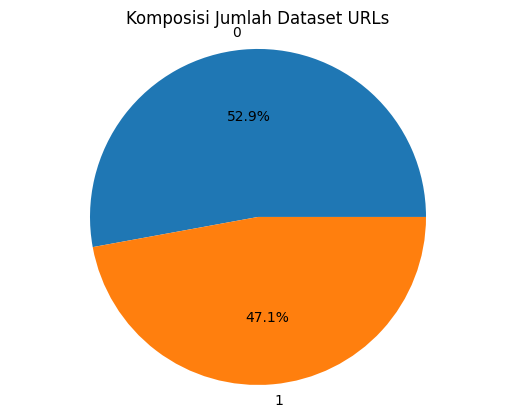

In [ ]:
# Konversi data menjadi DataFrame
df = pd.DataFrame(combined_all, columns=['Label'])

# Hitung jumlah masing-masing label
label_count = df['Label'].value_counts()

# Buat pie chart menggunakan Seaborn
plt.title('Komposisi Jumlah Dataset URLs')
plt.pie(label_count, labels=label_count.index, autopct='%1.1f%%')

# Tampilkan pie chart
plt.axis('equal')
plt.show()

# Feature Engineering

In [ ]:
# importing required packages for this section
from urllib.parse import urlparse
import re

In [ ]:
#listing shortening services
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

In [ ]:
#Cek adanya penyederhanaan pada url (Tiny_URL)
def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0
combined_all['tiny_url'] = combined_all['URL'].apply(lambda i: tinyURL(i))

In [ ]:
# https in scheme
def httpsURL(url):
  # Parse the URL to extract the scheme/protocol
  parsed_url = urlparse(url)
  scheme = parsed_url.scheme

  # Check if the scheme/protocol is "https"
  if scheme == "https":
    return 0  # Legitimate
  else:
    return 1  # Phishing

combined_all['https_scheme'] = combined_all['URL'].apply(lambda i: httpsURL(i))

# url = 'https://colab.research.google.com/drive/1EpFJ9hNLUqSVpakEaCROVT6J8SqL40nt#scrollTo=yPUvNqOJDRXl'
# result = detect_https_protocol(url)
# print(result)

In [ ]:
# https in scheme
def httpURL(url):
  # Parse the URL to extract the scheme/protocol
  parsed_url = urlparse(url)
  scheme = parsed_url.scheme

  # Check if the scheme/protocol is "https"
  if scheme == "http":
    return 1 # Phishing
  else:
    return 0  # Legitimate

combined_all['http_scheme'] = combined_all['URL'].apply(lambda i: httpURL(i))

# url = 'http://colab.research.google.com/drive/1EpFJ9hNLUqSVpakEaCROVT6J8SqL40nt#scrollTo=yPUvNqOJDRXl'
# result = detect_http_protocol(url)
# print(result)

In [ ]:
# Fungsi untuk memeriksa validitas TLD
def tldValid(url):
    valid_tlds = ['aero', 'asia', 'biz', 'cat','com', 'coop', 'info', 'int','jobs','mobi','museum', 'name', 'net', 'org', 'pro', 'tel', 'travel', 'xxx', 'edu',
                  'gov', 'mil', 'ac', 'ad', 'ae', 'af', 'ag', 'ai', 'al', 'am', 'an', 'ao', 'aq', 'ar', 'as', 'at', 'au', 'aw', 'ax', 'az', 'ba', 'bb', 'bd', 'be',
                  'bf', 'bg', 'bh', 'bi', 'bj', 'bm', 'bn', 'bo', 'br', 'bs', 'bt', 'bv', 'bw', 'by', 'bz', 'ca', 'cc', 'cd', 'cf', 'cg', 'ch', 'ci', 'ck', 'cl',
                  'cm', 'cn', 'co', 'cr', 'cs', 'cu', 'cv', 'cx', 'cy', 'cz', 'dd', 'de', 'dj', 'dk', 'dm', 'do', 'dz', 'ec', 'ee', 'eg', 'eh', 'er', 'es', 'et',
                  'eu', 'fi', 'fj', 'fk', 'fm', 'fo', 'fr', 'ga', 'gb', 'gd', 'ge', 'gf', 'gg', 'gh', 'gi', 'gl', 'gm', 'gn', 'gp', 'gq', 'gr', 'gs', 'gt', 'gu',
                  'gw', 'gy', 'hk', 'hm', 'hn', 'hr', 'ht', 'hu', 'id', 'ie', 'il', 'im', 'in', 'io', 'iq', 'ir', 'is', 'it', 'je', 'jm', 'jo', 'jp', 'ke', 'kg',
                  'kh', 'ki', 'km', 'kn', 'kp', 'kr', 'kw', 'ky', 'kz', 'la', 'lb', 'lc', 'li', 'lk', 'lr', 'ls', 'lt', 'lu', 'lv', 'ly', 'ma', 'mc', 'md', 'me',
                  'mg', 'mh', 'mk', 'ml', 'mm', 'mn', 'mo', 'mp', 'mq', 'mr', 'ms', 'mt', 'mu', 'mv', 'mw', 'mx', 'my', 'mz', 'na', 'nc', 'ne', 'nf', 'ng', 'ni',
                  'nl', 'no', 'np', 'nr', 'nu', 'nz', 'om', 'pa', 'pe', 'pf', 'pg', 'ph', 'pk', 'pl', 'pm', 'pn', 'pr', 'ps', 'pt', 'pw', 'py', 'qa', 're', 'ro',
                  'rs', 'ru', 'rw', 'sa', 'sb', 'sc', 'sd', 'se', 'sg', 'sh', 'si', 'sj', 'sk', 'sl', 'sm', 'sn', 'so', 'sr', 'ss', 'st', 'su', 'sv', 'sy', 'sz',
                  'tc', 'td', 'tf', 'tg', 'th', 'tj', 'tk', 'tl', 'tm', 'tn', 'to', 'tp', 'tr', 'tt', 'tv', 'tw', 'tz', 'ua', 'ug', 'uk', 'us', 'uy', 'uz', 'va',
                  'vc', 've', 'vg', 'vi', 'vn', 'vu', 'wf', 'ws', 'ye', 'yt', 'yu', 'za', 'zm', 'zw']
    parsed_url = urlparse(url)
    domain = parsed_url.netloc.split('.')[-1]
    if domain in valid_tlds:
        return 0
    else:
        return 1

combined_all['top_level_domain'] = combined_all['URL'].apply(lambda i: tldValid(i))

In [ ]:
# Fungsi untuk menghitung panjang URL
def getLength(url):
    if len(url) < 75:
        length = 0
    elif 75 <= len(url) < 100:
        length = 0.5
    else:
        length = 1
    return length

combined_all['len_url_full'] = combined_all['URL'].apply(lambda i: getLength(i))

In [ ]:
# Fungsi untuk memeriksa jumlah karakter alfabet dalam URL
def alphabet_length(url):
    alphabet_count = sum(1 for char in url if char.isalpha())
    if alphabet_count > 10:
        return 0
    else:
        return 1
combined_all['len_alphabet_full'] = combined_all['URL'].apply(lambda i: alphabet_length(i))

In [ ]:
# Fungsi untuk memeriksa jumlah karakter non-alfabet dalam URL
def non_alphabet_length(url):
    non_alphabet_count = sum(1 for char in url if not char.isalpha())
    if non_alphabet_count < 3:
        return 0
    else:
        return 1
combined_all['len_non_alphabet_full'] = combined_all['URL'].apply(lambda i: non_alphabet_length(i))

In [ ]:
# Fungsi untuk memeriksa jumlah karakter khusus dalam URL
def special_character_length(url):
    special_character_count = sum(1 for char in url if not char.isalnum())
    if special_character_count == 0:
        return 0
    else:
        return 1
combined_all['len_spec_character_full'] = combined_all['URL'].apply(lambda i: special_character_length(i))

In [ ]:

# Fungsi untuk menghitung jumlah simbol "@" dalam URL
def count_at_symbol(url):
    at_count = url.count('@')
    if at_count == 0:
        return 0  # Legitimate
    else:
        return 1 # Suspicious
combined_all['count@_full'] = combined_all['URL'].apply(lambda i: count_at_symbol(i))

In [ ]:
# Fungsi untuk menghitung jumlah simbol "." dalam URL
def count_dot(url):
    dot_count = url.count('.')
    if dot_count < 3:
        return 0  # Legitimate
    else:
        return 1  # Suspicious
combined_all['count_dot_full'] = combined_all['URL'].apply(lambda i: count_dot(i))

In [ ]:
# Fungsi untuk menghitung jumlah simbol "-" dalam URL
def count_dash(url):
    dash_count = url.count('-')
    if dash_count < 3:
        return 0
    else:
        return 1
combined_all['count_dash_full'] = combined_all['URL'].apply(lambda i: count_dash(i))

In [ ]:
# Fungsi untuk menghitung jumlah simbol "_" dalam URL
def count_underscore(url):
    underscore_count = url.count('_')
    if underscore_count == 0:
        return 0
    else:
        return 1
combined_all['count_underscore_full'] = combined_all['URL'].apply(lambda i: count_underscore(i))

In [ ]:
# Fungsi untuk menghitung jumlah simbol "/" dalam URL
def count_slash(url):
    slash_count = url.count('/')
    if slash_count < 5:
        return 0
    else:
        return 1
combined_all['count_slash_full'] = combined_all['URL'].apply(lambda i: count_slash(i))

In [ ]:
# Fungsi untuk menghitung jumlah simbol "?" dalam URL
def count_question_mark(url):
    question_mark_count = url.count('?')
    if question_mark_count == 0:
        return 0
    else:
        return 1
combined_all['count_question_mark_full'] = combined_all['URL'].apply(lambda i: count_question_mark(i))

In [ ]:
# Fungsi untuk menghitung jumlah simbol "=" dalam URL
def count_equal(url):
    equal_count = url.count('=')
    if equal_count == 0:
        return 0
    else:
        return 1
combined_all['count_equal_full'] = combined_all['URL'].apply(lambda i: count_equal(i))

In [ ]:
# Fungsi untuk menghitung jumlah simbol "&" dalam URL
def count_ampersand(url):
    ampersand_count = url.count('&')
    if ampersand_count == 0:
        return 0
    else:
        return 1
combined_all['count_ampersand_full'] = combined_all['URL'].apply(lambda i: count_ampersand(i))

In [ ]:
# Fungsi untuk menghitung jumlah koma dalam URL
def count_comma(url):
    comma_count = url.count(',')
    if comma_count == 0:
        return 0
    else:
        return 1
combined_all['count_comma_full'] = combined_all['URL'].apply(lambda i: count_comma(i))

In [ ]:
# Fungsi untuk menghitung jumlah asterisk dalam URL
def count_asterisk(url):
    asterisk_count = url.count('*')
    if asterisk_count == 0:
        return 0
    else:
        return 1
combined_all['count_asterisk_full'] = combined_all['URL'].apply(lambda i: count_asterisk(i))

In [ ]:
# Fungsi untuk menghitung jumlah tanda pagar dalam URL
def count_hashtag(url):
    hashtag_count = url.count('#')
    if hashtag_count == 1:
        return 0
    else:
        return 1
combined_all['count_hashtag_full'] = combined_all['URL'].apply(lambda i: count_hashtag(i))

In [ ]:
# Fungsi untuk menghitung jumlah titik koma dalam URL
def count_semicolon(url):
    semicolon_count = url.count(';')
    if semicolon_count == 0:
        return 0
    else:
        return 1
combined_all['count_semicolon_full'] = combined_all['URL'].apply(lambda i: count_semicolon(i))

In [ ]:
# Domain of the URL (Domain)
def getDomain(url):
  domain = urlparse(url).netloc
  if re.match(r"^www.",domain):
    domain = domain.replace("www.","")
  return domain

url= 'https://www.colab.research.google.com/drive/1EpFJ9hNLUqSVpakEaCROVT6J8SqL40nt#scrollTo=ZmhhaXruVUNV'
domain = getDomain(url)
netloc_parts = domain.split('.')  # Memecah domain menjadi bagian-bagian
subdomain = '.'.join(netloc_parts[:-2])  # Menggabungkan bagian-bagian kecuali yang terakhi
subdomain_length = len(domain)
print(netloc_parts)
print(domain)
print(subdomain)
print(subdomain_length)

['colab', 'research', 'google', 'com']
colab.research.google.com
colab.research
25


In [ ]:
# Fungsi untuk menghitung panjang domain dalam URL
def domain_length(url):
    domain = getDomain(url)
    if len(domain) < 20:
        return 0
    else:
        return 1
combined_all['domain_length'] = combined_all['URL'].apply(lambda i: domain_length(i))

In [ ]:
# Fungsi untuk menghitung jumlah karakter alfabet dalam domain URL
def alphabet_domain_length(url):
    domain = getDomain(url)
    alphabet_count = sum(c.isalpha() for c in domain)
    if alphabet_count > 4:
        return 0
    else:
        return 1
combined_all['len_alphabet_domain'] = combined_all['URL'].apply(lambda i: alphabet_domain_length(i))

In [ ]:
# Fungsi untuk menghitung jumlah karakter non alfabet dalam domain URL
def non_alphabet_domain_length(url):
    domain = getDomain(url)
    non_alphabet_count = sum(not c.isalpha() for c in domain)
    if non_alphabet_count < 3:
        return 0
    else:
        return 1
combined_all['len_non_alphabet_domain'] = combined_all['URL'].apply(lambda i: non_alphabet_domain_length(i))
# url = 'signin.eby.de.zukruygxctzmmqi.civpro.co.za'
# result = nonalphabet_domain_count(url)
# print(result)

In [ ]:
# Fungsi untuk memeriksa jumlah karakter khusus dalam domain URL
def special_chars_domain_length(url):
    domain = getDomain(url)
    special_chars = set("!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~")
    special_char_count = sum(c in special_chars for c in domain)
    if special_char_count == 0 :
        return 0
    else:
        return 1
combined_all['len_special_chars_domain'] = combined_all['URL'].apply(lambda i: special_chars_domain_length(i))

In [ ]:
# Fungsi untuk memeriksa jumlah @ dalam domain URL
def count_at_domain(url):
    domain = getDomain(url)
    at_count = domain.count('@')
    return 0 if at_count == 0 else 1
combined_all['count@_domain'] = combined_all['URL'].apply(lambda i: count_at_domain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah . dalam domain URL
def count_dot_domain(url):
    domain = getDomain(url)
    dot_count = domain.count('.')
    return 0 if dot_count == 0 else 1
combined_all['count_dot_domain'] = combined_all['URL'].apply(lambda i: count_dot_domain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah - dalam domain URL
def count_dash_domain(url):
    domain = getDomain(url)
    dash_count = domain.count('-')
    return 0 if dash_count < 3 else 1
combined_all['count_dash_domain'] = combined_all['URL'].apply(lambda i: count_dash_domain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah _ dalam domain URL
def count_underscore_domain(url):
    domain = getDomain(url)
    underscore_count = domain.count('_')
    return 0 if underscore_count == 0 else 1
combined_all['count_underscore_domain'] = combined_all['URL'].apply(lambda i: count_underscore_domain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah / dalam domain URL
def count_slash_domain(url):
    domain = getDomain(url)
    slash_count = domain.count('/')
    return 0 if slash_count == 0 else 1
combined_all['count_slash_domain'] = combined_all['URL'].apply(lambda i: count_slash_domain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah ? dalam domain URL
def count_question_mark_domain(url):
    domain = getDomain(url)
    count_question_mark_count = domain.count('?')
    return 0 if count_question_mark_count == 0 else 1
combined_all['count_question_mark_domain'] = combined_all['URL'].apply(lambda i: httpURL(i))

In [ ]:
# Fungsi untuk memeriksa jumlah = dalam domain URL
def count_equal_domain(url):
    domain = getDomain(url)
    count_equal_count = domain.count('=')
    return 0 if count_equal_count == 0 else 1
combined_all['count_equal_domain'] = combined_all['URL'].apply(lambda i: count_equal_domain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah & dalam domain URL
def count_ampersand_domain(url):
    domain = getDomain(url)
    count_ampersand_count = domain.count('&')
    return 0 if count_ampersand_count == 0 else 1
combined_all['count_ampersand_domain'] = combined_all['URL'].apply(lambda i: httpURL(i))

In [ ]:
# Fungsi untuk memeriksa jumlah , dalam domain URL
def count_comma_domain(url):
    domain = getDomain(url)
    count_comma_count = domain.count(',')
    return 0 if count_comma_count == 0 else 1
combined_all['count_comma_domain'] = combined_all['URL'].apply(lambda i: count_comma_domain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah * dalam domain URL
def count_asterisk_domain(url):
    domain = getDomain(url)
    count_asterisk_count = domain.count('*')
    return 0 if count_asterisk_count == 0 else 1
combined_all['count_asterisk_domain'] = combined_all['URL'].apply(lambda i: httpURL(i))

In [ ]:
# Fungsi untuk memeriksa jumlah # dalam domain URL
def count_hashtag_domain(url):
    domain = getDomain(url)
    count_hashtag_count = domain.count('#')
    return 0 if count_hashtag_count == 0 else 1
combined_all['count_hashtag_domain'] = combined_all['URL'].apply(lambda i: count_hashtag_domain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah ; dalam domain URL
def count_semicolon_domain(url):
    domain = getDomain(url)
    count_semicolon_count = domain.count(';')
    return 0 if count_semicolon_count == 0 else 1
combined_all['count_semicolon_domain'] = combined_all['URL'].apply(lambda i: count_semicolon_domain(i))

In [ ]:
url = 'signin.eby.de.zukruygxctzmmqi.civpro.co.za'
parsed_url = urlparse(url)
print(parsed_url)

ParseResult(scheme='', netloc='', path='signin.eby.de.zukruygxctzmmqi.civpro.co.za', params='', query='', fragment='')


In [ ]:
url = 'https://www.kaggle.com/code/tylersullivan/classifying-phishing-urls-three-models'
parsed_url = urlparse(url)
print(parsed_url)

ParseResult(scheme='https', netloc='www.kaggle.com', path='/code/tylersullivan/classifying-phishing-urls-three-models', params='', query='', fragment='')


In [ ]:
url = 'https://www.kaggle.com/code/tylersullivan/classifying-phishing-urls-three-models'
parsed_url = urlparse(url)
domain = parsed_url.netloc.split('.')  # Mengambil domain dari URL
print(domain)

['www', 'kaggle', 'com']


In [ ]:
url1 = 'https://www.kaggle.com/code/tylersullivan/classifying-phishing-urls-three-models'
parsed_url = getDomain(url1)
netloc_parts = parsed_url.split('.')  # Memecah domain menjadi bagian-bagian
subdomain = '.'.join(netloc_parts[:-2])  # Menggabungkan bagian-bagian kecuali yang terakhir
print(parsed_url)
print(subdomain)

kaggle.com



In [ ]:
url1 = 'retajconsultancy.com'
parsed_url = getDomain(url1)
netloc_parts = parsed_url.split('.')  # Memecah domain menjadi bagian-bagian
subdomain = '.'.join(netloc_parts[:-2])  # Menggabungkan bagian-bagian kecuali yang terakhir
print(parsed_url)
print(subdomain)

In [ ]:
def getSubdomain(url):
  domain = getDomain(url)
  netloc_parts = domain.split('.')  # Memecah domain menjadi bagian-bagian
  if len(netloc_parts) <= 2:  # Jika URL tidak memiliki subdomain
    return 0
  else:
    subdomain = '.'.join(netloc_parts[:-2])  # Menggabungkan bagian-bagian subdomain
    return subdomain

In [ ]:
# Fungsi untuk menghitung panjang subdomain dalam URL
def len_subdomain(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      subdomain_length = len(subdomain)
      return 0 if subdomain_length < 15 else 1
combined_all['len_subdomain'] = combined_all['URL'].apply(lambda i: len_subdomain(i))

# Contoh penggunaan
# result = len_subdomain(url)
# print(result)  # Output: 0

In [ ]:
# Fungsi untuk memeriksa jumlah karakter alfabet dalam subdomain URL
def alphabet_subdomain_length(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      alphabet_count = sum(c.isalpha() for c in subdomain)
      return 0 if alphabet_count > 4 else 1
combined_all['len_alphabet_subdomain'] = combined_all['URL'].apply(lambda i: alphabet_subdomain_length(i))

In [ ]:
# Fungsi untuk memeriksa jumlah karakter non alfabet dalam subdomain URL
def non_alphabet_subdomain_length(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      non_alphabet_count = sum(not c.isalpha() for c in subdomain)
      return 0 if non_alphabet_count < 2 else 1
combined_all['len_non_alphabet_subdomain'] = combined_all['URL'].apply(lambda i: non_alphabet_subdomain_length(i))
# url = 'signin.eby.de.zukruygxctzmmqi.civpro.co.za'
# result = len_non_alphabet_subdomain(url)
# print(result)

In [ ]:
# Fungsi untuk memeriksa jumlah special karakter dalam subdomain URL
def spec_character_subdomain_length(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      spec_character_count = sum(not c.isalnum() for c in subdomain)
      return 0 if spec_character_count == 0 else 1
combined_all['len_special_char_subdomain'] = combined_all['URL'].apply(lambda i: spec_character_subdomain_length(i))

In [ ]:
# Fungsi untuk memeriksa jumlah @ dalam subdomain URL
def count_at_subdomain(url):
  subdomain = getSubdomain(url)
  if subdomain == 0:
    return 0
  else:
    count = subdomain.count('@')
    if count == 0:
      return 0
    else:
      return 1
combined_all['count@_subdomain'] = combined_all['URL'].apply(lambda i: count_at_subdomain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah . dalam subdomain URL
def count_dot_subdomain(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      count = subdomain.count('.')
      if count == 0:
        return 0
      else:
        return 1
combined_all['count_dot_subdomain'] = combined_all['URL'].apply(lambda i: count_dot_subdomain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah - dalam subdomain URL
def count_dash_subdomain(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      count = subdomain.count('-')
      if count < 2:
        return 0
      else:
        return 1
combined_all['count_dash_subdomain'] = combined_all['URL'].apply(lambda i: count_dash_subdomain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah / dalam subdomain URL
def count_slash_subdomain(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      count = subdomain.count('/')
      if count == 0:
        return 0
      else:
        return 1
combined_all['count_slash_subdomain'] = combined_all['URL'].apply(lambda i: count_slash_subdomain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah ? dalam subdomain URL
def count_question_mark_subdomain(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      count = subdomain.count('?')
      if count == 0:
        return 0
      else:
        return 1
combined_all['count_question_mark_subdomain'] = combined_all['URL'].apply(lambda i: count_question_mark_subdomain(i))

In [ ]:
def count_equal_subdomain(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      count = subdomain.count('=')
      if count == 0:
        return 0
      else:
        return 1
combined_all['count_equal_subdomain'] = combined_all['URL'].apply(lambda i: count_equal_subdomain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah & dalam subdomain URL
def count_ampersand_subdomain(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      count = subdomain.count('&')
      if count == 0:
        return 0
      else:
        return 1
combined_all['count_ampersand_subdomain'] = combined_all['URL'].apply(lambda i: count_ampersand_subdomain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah , dalam subdomain URL
def count_comma_subdomain(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      count = subdomain.count(',')
      if count == 0:
        return 0
      else:
        return 1
combined_all['count_comma_subdomain'] = combined_all['URL'].apply(lambda i: count_comma_subdomain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah * dalam subdomain URL
def count_asterisk_subdomain(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      count = subdomain.count('*')
      if count == 0:
        return 0
      else:
        return 1
combined_all['count_asterisk_subdomain'] = combined_all['URL'].apply(lambda i: count_asterisk_subdomain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah # dalam subdomain URL
def count_hashtag_subdomain(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      count = subdomain.count('#')
      if count == 0:
        return 0
      else:
        return 1
combined_all['count_hashtag_subdomain'] = combined_all['URL'].apply(lambda i: count_hashtag_subdomain(i))

In [ ]:
# Fungsi untuk memeriksa jumlah ; dalam subdomain URL
def count_semicolon_subdomain(url):
    subdomain = getSubdomain(url)
    if subdomain == 0:
      return 0
    else:
      count = subdomain.count(';')
      if count == 0:
        return 0
      else:
        return 1
combined_all['count_semicolon_subdomain'] = combined_all['URL'].apply(lambda i: count_semicolon_subdomain(i))

In [ ]:
# Fungsi untuk menghitung rasio panjang URL terhadap panjang path
def calculate_url_path_ratio(url):
    parsed_url = urlparse(url)
    path = parsed_url.path
    if len(path) == 0:
        return 0
    else:
        ratio = len(url) / len(path)
        if ratio < 3:
            return 0
        else:
            return 1
combined_all['ratio_url_path'] = combined_all['URL'].apply(lambda i: calculate_url_path_ratio(i))

In [ ]:
# Fungsi untuk menghitung rasio jumlah digit dalam URL terhadap panjang URL
def calculate_digit_ratio(url):
    num_digits = sum(c.isdigit() for c in url)
    if num_digits == 0:
        return 0
    else:
        ratio = num_digits / len(url)
        if ratio < 0.5:
            return 0
        else:
            return 1
combined_all['ratio_digit_url'] = combined_all['URL'].apply(lambda i: calculate_digit_ratio(i))

In [ ]:
def count_subdomains(url):
  domain = getDomain(url)
  dot_count = domain.count('.')
    # Determine feature value based on the number of dots
  if dot_count > 3:
    return 1  # Phishing
  elif dot_count == 3:
    return 0.5  # Suspicious
  else:
    return 0  # Legitimate
combined_all['count_subdomain'] = combined_all['URL'].apply(lambda i: count_subdomains(i))

In [ ]:
# Fungsi memeriksa IP address pada URL
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
combined_all['use_of_ip'] = combined_all['URL'].apply(lambda i: having_ip_address(i))

In [ ]:
# Gives number of '/' in URL path (URL_Depth)
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

combined_all['URL_Depth'] = combined_all['URL'].apply(lambda i: getDepth(i))

In [ ]:
# Checking for redirection '//' in the url (Redirection)
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0

combined_all['Redirection'] = combined_all['URL'].apply(lambda i: redirection(i))

In [ ]:
#Cek kemunculan kata sensitive pada url
def detect_sensitive_words(url):
  match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr|validate|activate|secure', url)
  if match:
    return 1
  else:
    return 0
combined_all['Sensitive_Word'] = combined_all['URL'].apply(lambda i: detect_sensitive_words(i))

In [ ]:
# Cek panjang hostname pada url
def hostname_length(url):
    return len(urlparse(url).netloc)
combined_all['hostname_length'] = combined_all['URL'].apply(lambda i: hostname_length(i))

In [ ]:
combined_all

,URL,Label,tiny_url,https_scheme,http_scheme,top_level_domain,len_url_full,len_alphabet_full,len_non_alphabet_full,len_spec_character_full,...,count_hashtag_subdomain,count_semicolon_subdomain,ratio_url_path,ratio_digit_url,count_subdomain,use_of_ip,URL_Depth,Redirection,Sensitive_Word,hostname_length
0,signin.eby.de.zukruygxctzmmqi.civpro.co.za,1,0,1,0,1,0.0,0,1,1,...,0,0,0,0,0.0,0,1,0,1,0
1,http://www.marketingbyinternet.com/mo/e56508df...,1,1,1,1,0,0.0,0,1,1,...,0,0,0,0,0.0,0,2,0,0,27
2,https://docs.google.com/spreadsheet/viewform?f...,1,0,0,0,0,0.5,0,1,1,...,0,0,1,0,0.0,0,2,0,0,15
3,retajconsultancy.com,1,0,1,0,1,0.0,0,0,1,...,0,0,0,0,0.0,0,1,0,0,0
4,alexpay2.beget.tech,1,0,1,0,1,0.0,0,1,1,...,0,0,0,0,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,https://www.skincareliving.com,1,0,0,0,0,0.0,0,1,1,...,0,0,0,0,0.0,0,0,0,0,22
235791,https://www.winchester.gov.uk,1,0,0,0,0,0.0,0,1,1,...,0,0,0,0,0.0,0,0,0,0,21
235792,https://www.nononsensedesign.be,1,0,0,0,0,0.0,0,1,1,...,0,0,0,0,0.0,0,0,0,0,23
235793,https://patient-cell-40f5.updatedlogmylogin.wo...,0,0,0,0,1,0.0,0,1,1,...,0,0,1,0,0.5,0,0,0,1,47


In [ ]:
#Storing the data in CSV file (opsional)
combined_all[['URL', 'Label', 'tiny_url', 'https_scheme', 'http_scheme',
       'top_level_domain', 'len_url_full', 'len_alphabet_full',
       'len_non_alphabet_full', 'len_spec_character_full', 'count@_full',
       'count_dot_full', 'count_dash_full', 'count_underscore_full',
       'count_slash_full', 'count_question_mark_full', 'count_equal_full',
       'count_ampersand_full', 'count_comma_full', 'count_asterisk_full',
       'count_hashtag_full', 'count_semicolon_full', 'domain_length',
       'len_alphabet_domain', 'len_non_alphabet_domain',
       'len_special_chars_domain', 'count@_domain', 'count_dot_domain',
       'count_dash_domain', 'count_underscore_domain', 'count_slash_domain',
       'count_question_mark_domain', 'count_equal_domain',
       'count_ampersand_domain', 'count_comma_domain', 'count_asterisk_domain',
       'count_hashtag_domain', 'count_semicolon_domain', 'len_subdomain',
       'len_alphabet_subdomain', 'len_non_alphabet_subdomain',
       'len_special_char_subdomain', 'count@_subdomain', 'count_dot_subdomain',
       'count_dash_subdomain', 'count_slash_subdomain',
       'count_question_mark_subdomain', 'count_equal_subdomain',
       'count_ampersand_subdomain', 'count_comma_subdomain',
       'count_asterisk_subdomain', 'count_hashtag_subdomain',
       'count_semicolon_subdomain', 'ratio_url_path', 'ratio_digit_url',
       'count_subdomain', 'use_of_ip', 'URL_Depth', 'Redirection',
       'Sensitive_Word', 'hostname_length']].to_csv('urldataset-all_new-with-all-features.csv', index=False)

# Menentukan Feature dan Terget

In [ ]:
combined_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 853314 entries, 0 to 235794
Data columns (total 61 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   URL                            853314 non-null  object 
 1   Label                          853314 non-null  int64  
 2   tiny_url                       853314 non-null  int64  
 3   https_scheme                   853314 non-null  int64  
 4   http_scheme                    853314 non-null  int64  
 5   top_level_domain               853314 non-null  int64  
 6   len_url_full                   853314 non-null  float64
 7   len_alphabet_full              853314 non-null  int64  
 8   len_non_alphabet_full          853314 non-null  int64  
 9   len_spec_character_full        853314 non-null  int64  
 10  count@_full                    853314 non-null  int64  
 11  count_dot_full                 853314 non-null  int64  
 12  count_dash_full                8533

In [ ]:
combined_all.columns

Index(['URL', 'Label', 'tiny_url', 'https_scheme', 'http_scheme',
       'top_level_domain', 'len_url_full', 'len_alphabet_full',
       'len_non_alphabet_full', 'len_spec_character_full', 'count@_full',
       'count_dot_full', 'count_dash_full', 'count_underscore_full',
       'count_slash_full', 'count_question_mark_full', 'count_equal_full',
       'count_ampersand_full', 'count_comma_full', 'count_asterisk_full',
       'count_hashtag_full', 'count_semicolon_full', 'domain_length',
       'len_alphabet_domain', 'len_non_alphabet_domain',
       'len_special_chars_domain', 'count@_domain', 'count_dot_domain',
       'count_dash_domain', 'count_underscore_domain', 'count_slash_domain',
       'count_question_mark_domain', 'count_equal_domain',
       'count_ampersand_domain', 'count_comma_domain', 'count_asterisk_domain',
       'count_hashtag_domain', 'count_semicolon_domain', 'len_subdomain',
       'len_alphabet_subdomain', 'len_non_alphabet_subdomain',
       'len_special_char_s

##all

In [ ]:
#Predictor Variables
# filtering out google_index,fd_length, count_underscore_subdomain
X = combined_all[['tiny_url', 'https_scheme', 'http_scheme',
       'top_level_domain', 'len_url_full', 'len_alphabet_full',
       'len_non_alphabet_full', 'len_spec_character_full', 'count@_full',
       'count_dot_full', 'count_dash_full', 'count_underscore_full',
       'count_slash_full', 'count_question_mark_full', 'count_equal_full',
       'count_ampersand_full', 'count_comma_full', 'count_asterisk_full',
       'count_hashtag_full', 'count_semicolon_full', 'domain_length',
       'len_alphabet_domain', 'len_non_alphabet_domain',
       'len_special_chars_domain', 'count@_domain', 'count_dot_domain',
       'count_dash_domain', 'count_underscore_domain', 'count_slash_domain',
       'count_question_mark_domain', 'count_equal_domain',
       'count_ampersand_domain', 'count_comma_domain', 'count_asterisk_domain',
       'count_hashtag_domain', 'count_semicolon_domain', 'len_subdomain',
       'len_alphabet_subdomain', 'len_non_alphabet_subdomain',
       'len_special_char_subdomain', 'count@_subdomain', 'count_dot_subdomain',
       'count_dash_subdomain', 'count_slash_subdomain',
       'count_question_mark_subdomain', 'count_equal_subdomain',
       'count_ampersand_subdomain', 'count_comma_subdomain',
       'count_asterisk_subdomain', 'count_hashtag_subdomain',
       'count_semicolon_subdomain', 'ratio_url_path', 'ratio_digit_url',
       'count_subdomain', 'use_of_ip', 'URL_Depth', 'Redirection',
       'Sensitive_Word', 'hostname_length'
        ]]

#Target Variable
y = combined_all['Label']

##15fitur

In [ ]:
# 15 Predictor Variables
X = combined_all[['https_scheme', 'http_scheme', 'count_question_mark_domain', 'count_ampersand_domain', 'count_asterisk_domain',
          'ratio_url_path',
          'len_non_alphabet_domain',
          'len_non_alphabet_subdomain',
          'len_special_char_subdomain',
          'len_subdomain',
          'domain_length',
          'count_dash_subdomain',
          'hostname_length',
          'count_dot_subdomain',
          'count_subdomain'
        ]]
#Target Variable
y = combined_all['Label']

In [ ]:
# 14 Predictor Variables
X = combined_all[['https_scheme', 'http_scheme', 'count_question_mark_domain', 'count_ampersand_domain', 'count_asterisk_domain',
          'ratio_url_path',
          'len_non_alphabet_domain',
          'len_non_alphabet_subdomain',
          'len_special_char_subdomain',
          'len_subdomain',
          'domain_length',
          'count_dash_subdomain',
          'hostname_length',
          'count_dot_subdomain'
        ]]
#Target Variable
y = combined_all['Label']

In [ ]:
# 13 Predictor Variables
X = combined_all[['https_scheme', 'http_scheme', 'count_question_mark_domain', 'count_ampersand_domain', 'count_asterisk_domain',
          'ratio_url_path',
          'len_non_alphabet_domain',
          'len_non_alphabet_subdomain',
          'len_special_char_subdomain',
          'len_subdomain',
          'domain_length',
          'count_dash_subdomain',
          'hostname_length'
        ]]
#Target Variable
y = combined_all['Label']

In [ ]:
# 12 Predictor Variables
X = combined_all[['https_scheme', 'http_scheme', 'count_question_mark_domain', 'count_ampersand_domain', 'count_asterisk_domain',
          'ratio_url_path',
          'len_non_alphabet_domain',
          'len_non_alphabet_subdomain',
          'len_special_char_subdomain',
          'len_subdomain',
          'domain_length',
          'count_dash_subdomain'
        ]]
#Target Variable
y = combined_all['Label']

In [ ]:
# 11 Predictor Variables
X = combined_all[['https_scheme', 'http_scheme', 'count_question_mark_domain', 'count_ampersand_domain', 'count_asterisk_domain',
          'ratio_url_path',
          'len_non_alphabet_domain',
          'len_non_alphabet_subdomain',
          'len_special_char_subdomain',
          'len_subdomain',
          'domain_length'
        ]]
#Target Variable
y = combined_all['Label']

In [ ]:
# 10 Predictor Variables
X = combined_all[['https_scheme', 'http_scheme', 'count_question_mark_domain', 'count_ampersand_domain', 'count_asterisk_domain',
          'ratio_url_path',
          'len_non_alphabet_domain',
          'len_non_alphabet_subdomain',
          'len_special_char_subdomain',
          'len_subdomain'
        ]]
#Target Variable
y = combined_all['Label']

In [ ]:
# 9 Predictor Variables
X = combined_all[['https_scheme', 'http_scheme', 'count_question_mark_domain', 'count_ampersand_domain', 'count_asterisk_domain',
          'ratio_url_path',
          'len_non_alphabet_domain',
          'len_non_alphabet_subdomain',
          'len_special_char_subdomain'
        ]]
#Target Variable
y = combined_all['Label']

In [ ]:
# 8 Predictor Variables
X = combined_all[['https_scheme', 'http_scheme', 'count_question_mark_domain', 'count_ampersand_domain', 'count_asterisk_domain',
          'ratio_url_path',
          'len_non_alphabet_domain',
          'len_non_alphabet_subdomain'
        ]]
#Target Variable
y = combined_all['Label']

In [ ]:
# 7 Predictor Variables
X = combined_all[['https_scheme', 'http_scheme', 'count_question_mark_domain', 'count_ampersand_domain', 'count_asterisk_domain',
          'ratio_url_path',
          'len_non_alphabet_domain'
        ]]
#Target Variable
y = combined_all['Label']

In [ ]:
# 6 Predictor Variables
X = combined_all[['https_scheme', 'http_scheme', 'count_question_mark_domain', 'count_ampersand_domain', 'count_asterisk_domain',
          'ratio_url_path'
        ]]
#Target Variable
y = combined_all['Label']

In [ ]:
# 5 Predictor Variables
X = combined_all[['https_scheme', 'http_scheme', 'count_question_mark_domain', 'count_ampersand_domain', 'count_asterisk_domain'
        ]]
#Target Variable
y = combined_all['Label']

In [ ]:
discrete_features = X.dtypes == int

#Cek Korelasi
##Spearman Correlation

In [ ]:
combined_all = combined_all.drop("URL",axis=1)

In [ ]:
def corr_heatmap(data, idx_s, idx_e):
    y = combined_all['Label']
    temp = combined_all.iloc[:, idx_s:idx_e]

    temp['Label'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()

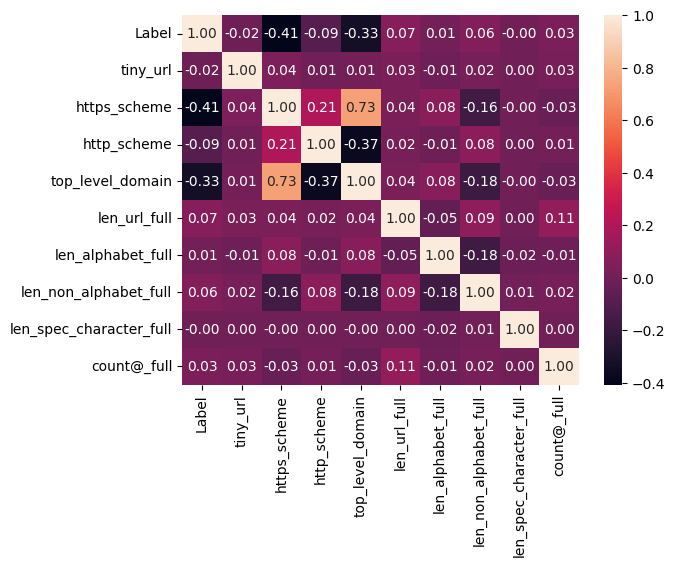

In [ ]:
corr_heatmap(data, 0, 10)

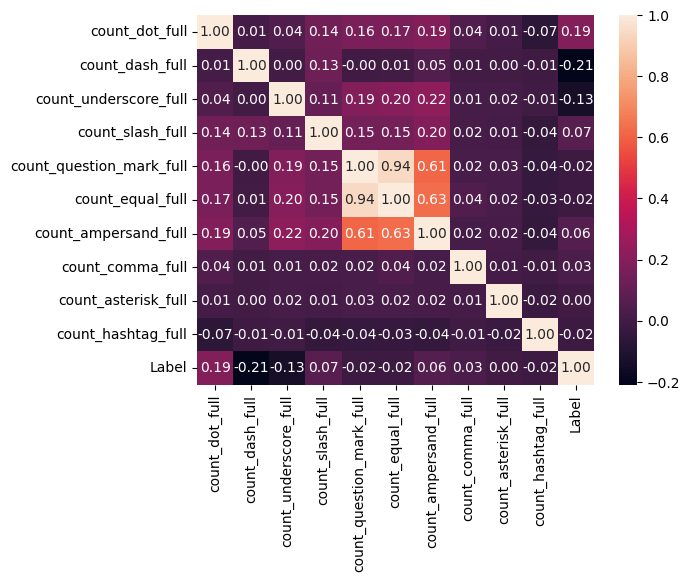

In [ ]:
corr_heatmap(data, 10, 20)

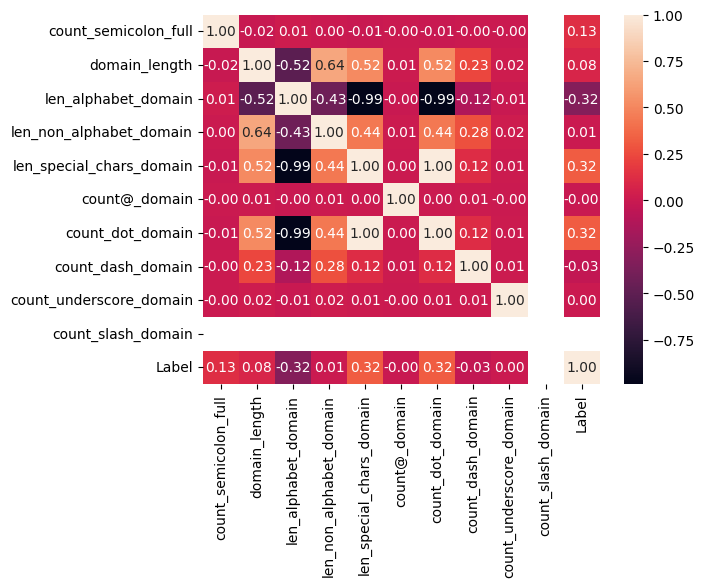

In [ ]:
corr_heatmap(data, 20, 30)

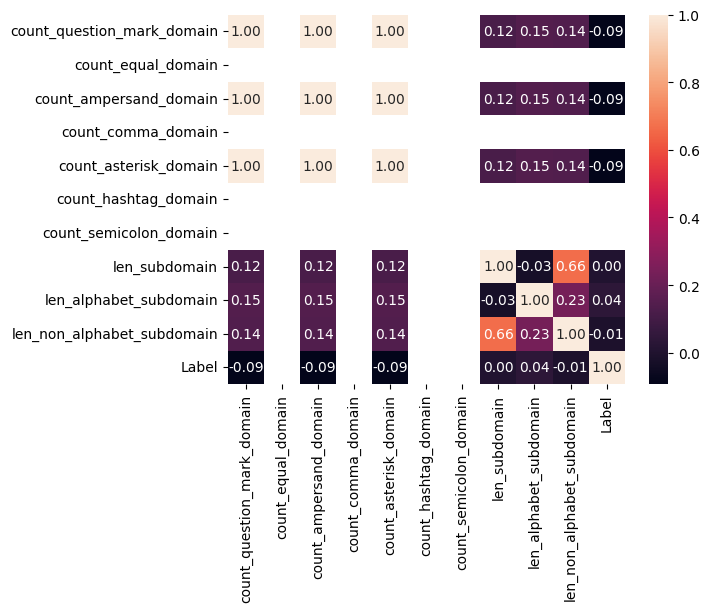

In [ ]:
corr_heatmap(data, 30, 40)

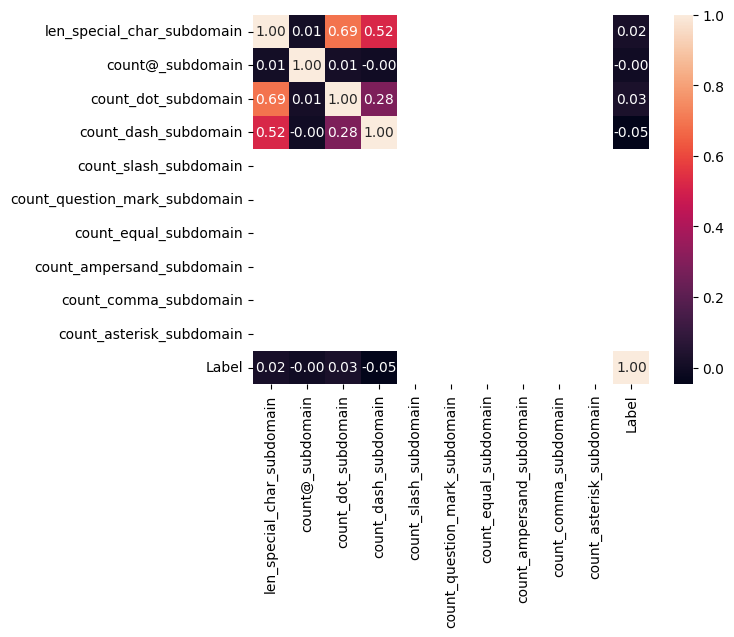

In [ ]:
corr_heatmap(data, 40, 50)

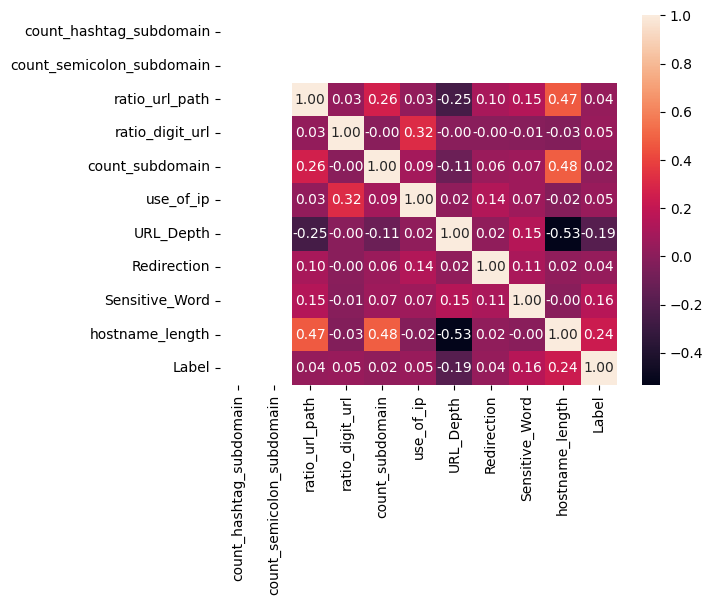

In [ ]:
corr_heatmap(data, 50, 62)

# Spliting Dataset - Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=42)

In [ ]:
X_train.shape

(682651, 59)

In [ ]:
X_test.shape

(170663, 59)

# Modelling

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

#Evaluasi

##train-test

###All fitur

In [ ]:
y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

     Class 0       0.74      0.85      0.79     90236
     Class 1       0.80      0.67      0.73     80427

    accuracy                           0.76    170663
   macro avg       0.77      0.76      0.76    170663
weighted avg       0.77      0.76      0.76    170663

accuracy:   0.765


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 76.49 %
Akurasi Model (Test)  : 76.47 %


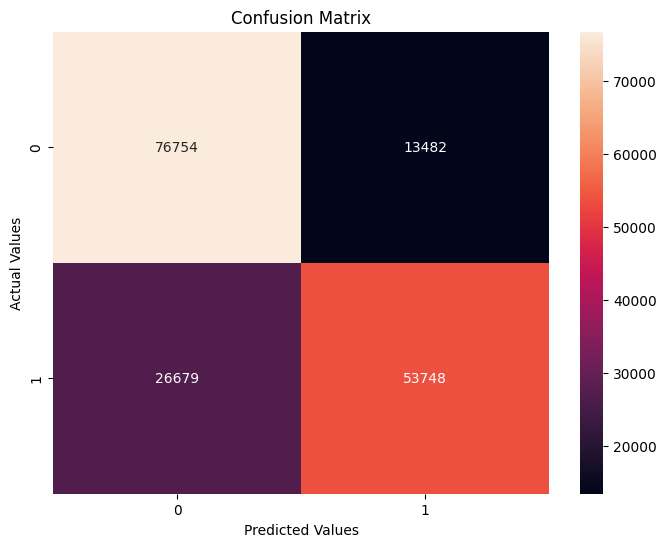

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

###15Fitur

In [ ]:
y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

     Class 0       0.66      0.91      0.77     90236
     Class 1       0.83      0.47      0.60     80427

    accuracy                           0.70    170663
   macro avg       0.74      0.69      0.68    170663
weighted avg       0.74      0.70      0.69    170663

accuracy:   0.705


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 70.36 %
Akurasi Model (Test)  : 70.5 %


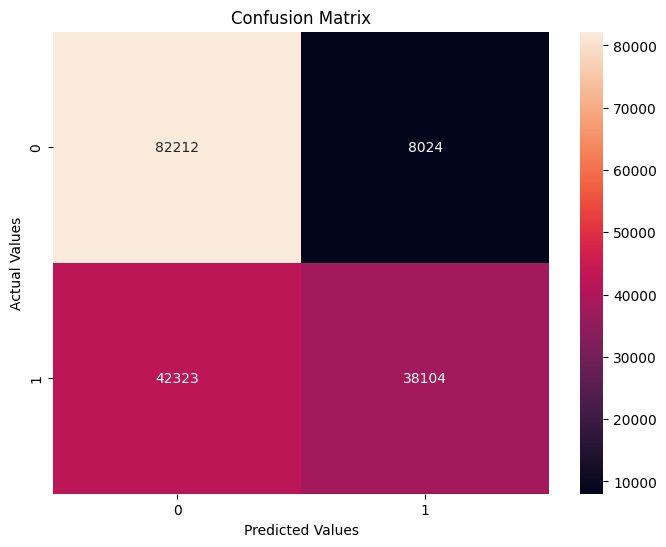

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

###14Fitur

In [ ]:
y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

     Class 0       0.66      0.91      0.77     90236
     Class 1       0.82      0.47      0.60     80427

    accuracy                           0.70    170663
   macro avg       0.74      0.69      0.68    170663
weighted avg       0.74      0.70      0.69    170663

accuracy:   0.705


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 70.33 %
Akurasi Model (Test)  : 70.46 %


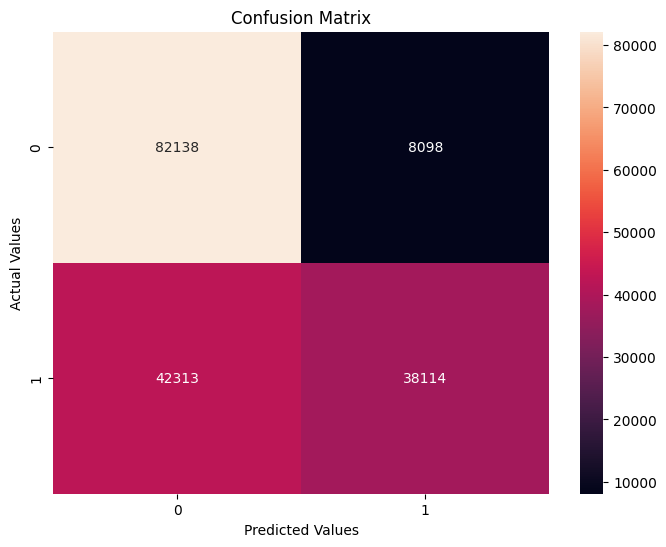

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

###13Fitur

In [ ]:
y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

     Class 0       0.66      0.91      0.77     90236
     Class 1       0.83      0.47      0.60     80427

    accuracy                           0.70    170663
   macro avg       0.74      0.69      0.68    170663
weighted avg       0.74      0.70      0.69    170663

accuracy:   0.705


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 70.33 %
Akurasi Model (Test)  : 70.47 %


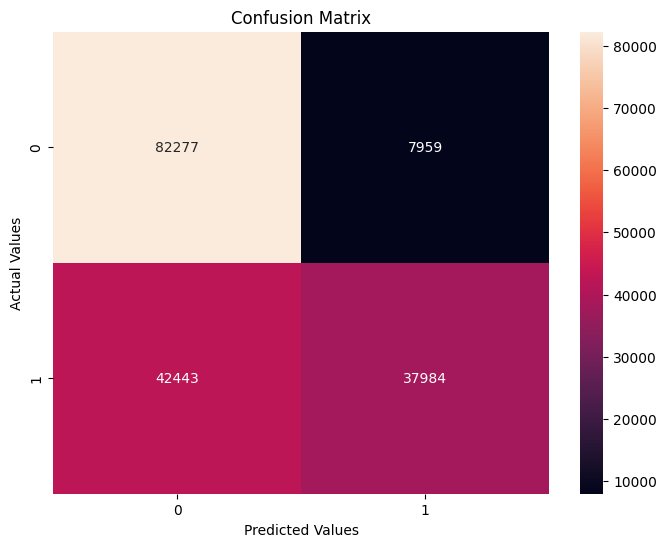

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

###12Fitur

In [ ]:
y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

     Class 0       0.66      0.91      0.76     90236
     Class 1       0.82      0.47      0.60     80427

    accuracy                           0.70    170663
   macro avg       0.74      0.69      0.68    170663
weighted avg       0.73      0.70      0.69    170663

accuracy:   0.703


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 70.2 %
Akurasi Model (Test)  : 70.32 %


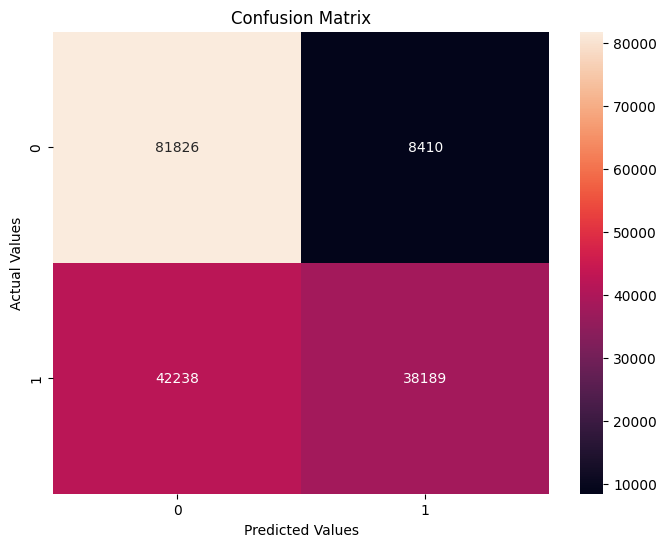

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

###11Fitur

In [ ]:
y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

     Class 0       0.66      0.89      0.76     90236
     Class 1       0.80      0.48      0.60     80427

    accuracy                           0.70    170663
   macro avg       0.73      0.69      0.68    170663
weighted avg       0.72      0.70      0.68    170663

accuracy:   0.699


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 69.73 %
Akurasi Model (Test)  : 69.86 %


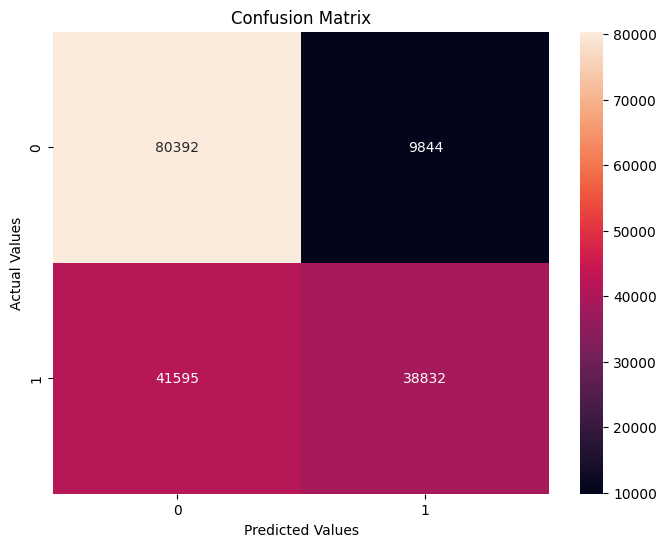

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

###10Fitur

In [ ]:
y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

     Class 0       0.66      0.89      0.76     90236
     Class 1       0.80      0.48      0.60     80427

    accuracy                           0.70    170663
   macro avg       0.73      0.69      0.68    170663
weighted avg       0.72      0.70      0.68    170663

accuracy:   0.699


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 69.73 %
Akurasi Model (Test)  : 69.86 %


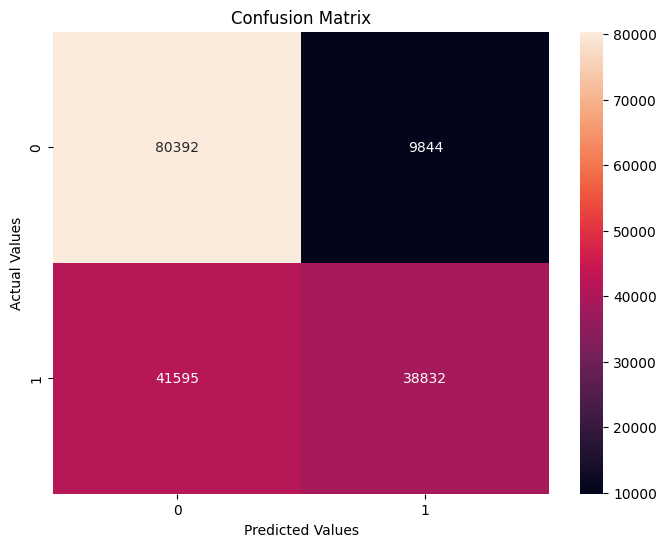

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

###9Fitur

In [ ]:
y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

     Class 0       0.66      0.89      0.76     90236
     Class 1       0.79      0.49      0.60     80427

    accuracy                           0.70    170663
   macro avg       0.72      0.69      0.68    170663
weighted avg       0.72      0.70      0.68    170663

accuracy:   0.697


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 69.59 %
Akurasi Model (Test)  : 69.69 %


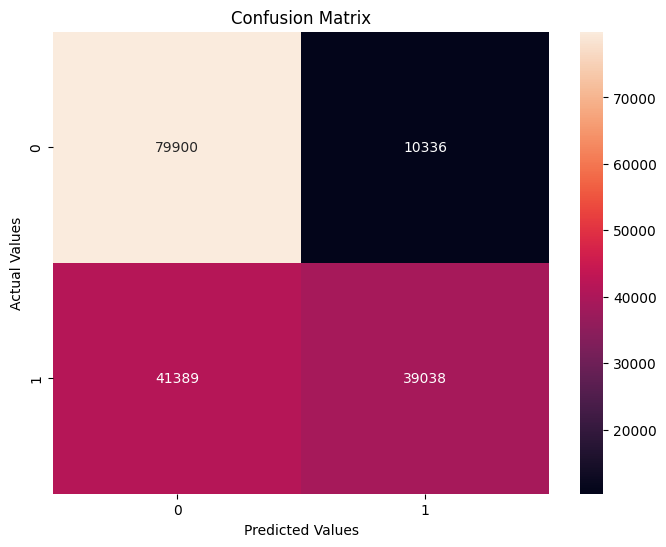

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

###8Fitur

In [ ]:
y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

     Class 0       0.66      0.89      0.76     90236
     Class 1       0.79      0.49      0.60     80427

    accuracy                           0.70    170663
   macro avg       0.72      0.69      0.68    170663
weighted avg       0.72      0.70      0.68    170663

accuracy:   0.697


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 69.59 %
Akurasi Model (Test)  : 69.69 %


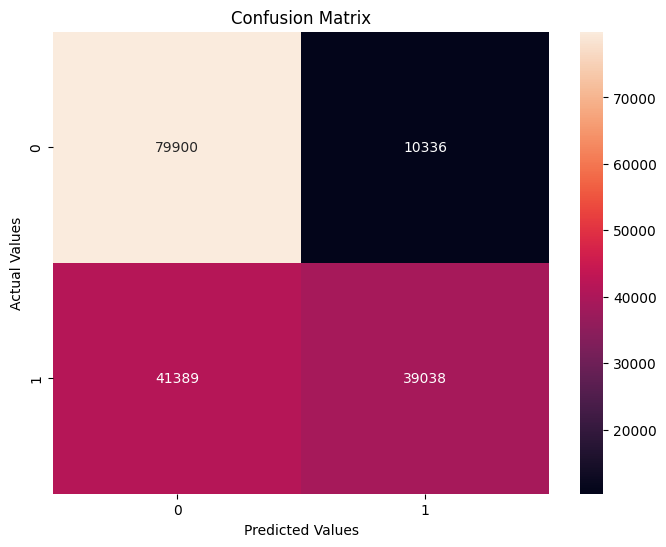

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

###7Fitur

In [ ]:
y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

     Class 0       0.66      0.89      0.76     90236
     Class 1       0.79      0.49      0.60     80427

    accuracy                           0.70    170663
   macro avg       0.72      0.69      0.68    170663
weighted avg       0.72      0.70      0.68    170663

accuracy:   0.697


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 69.59 %
Akurasi Model (Test)  : 69.69 %


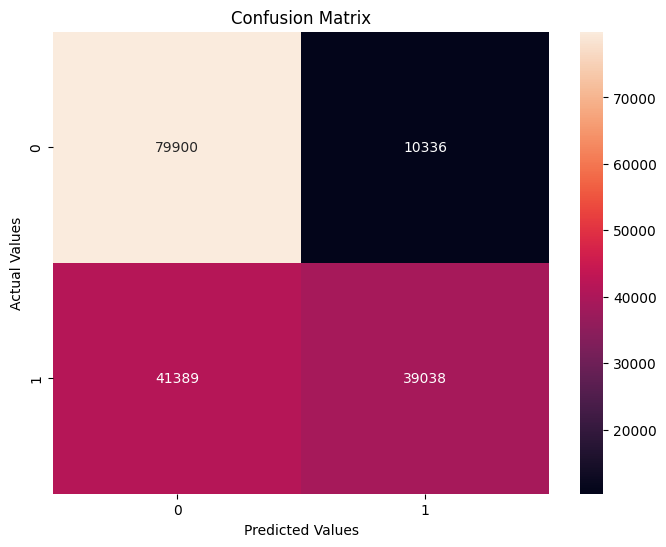

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

###6Fitur

In [ ]:
y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

     Class 0       0.66      0.89      0.76     90236
     Class 1       0.79      0.49      0.60     80427

    accuracy                           0.70    170663
   macro avg       0.72      0.69      0.68    170663
weighted avg       0.72      0.70      0.68    170663

accuracy:   0.697


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 69.59 %
Akurasi Model (Test)  : 69.69 %


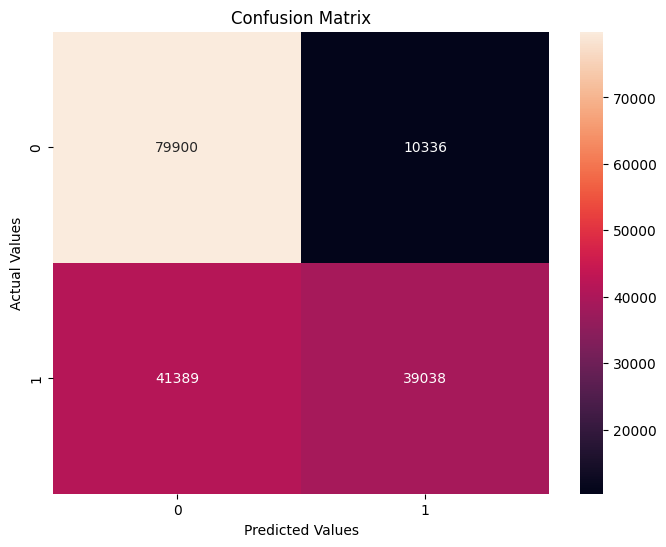

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

###5Fitur

In [ ]:
y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_pred_logreg,target_names=['Class 0','Class 1']))

score = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

     Class 0       0.66      0.89      0.76     90236
     Class 1       0.79      0.49      0.60     80427

    accuracy                           0.70    170663
   macro avg       0.72      0.69      0.68    170663
weighted avg       0.72      0.70      0.68    170663

accuracy:   0.697


In [ ]:
accuracy_train = logreg.score(X_train, y_train)
accuracy_test  = logreg.score(X_test, y_test)
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 69.59 %
Akurasi Model (Test)  : 69.69 %


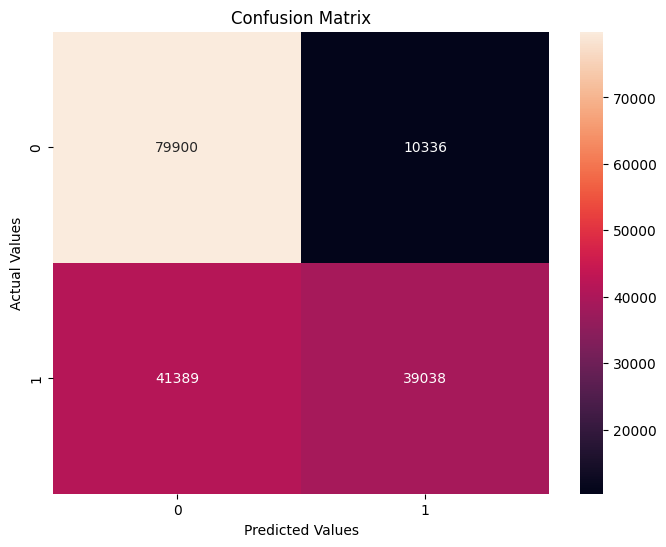

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm,
                     index = ['0', '1'],
                     columns = ['0','1'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt="g")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

##Kfold-cv

###All fitur

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.2f}%".format(scores.mean() * 100))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Hasil K-Fold Cross Validation:
Akurasi: 76.49%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###15 fitur

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.2f}%".format(scores.mean() * 100))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Hasil K-Fold Cross Validation:
Akurasi: 70.38%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###14 fitur

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.2f}%".format(scores.mean() * 100))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Hasil K-Fold Cross Validation:
Akurasi: 70.35%


###13 fitur

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.2f}%".format(scores.mean() * 100))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Hasil K-Fold Cross Validation:
Akurasi: 70.37%


###12 fitur

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.2f}%".format(scores.mean() * 100))

Hasil K-Fold Cross Validation:
Akurasi: 70.23%


###11 fitur

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.2f}%".format(scores.mean() * 100))

Hasil K-Fold Cross Validation:
Akurasi: 69.76%


###10 fitur

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.2f}%".format(scores.mean() * 100))

Hasil K-Fold Cross Validation:
Akurasi: 69.76%


###9 fitur

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.2f}%".format(scores.mean() * 100))

Hasil K-Fold Cross Validation:
Akurasi: 69.61%


###8 fitur

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.2f}%".format(scores.mean() * 100))

Hasil K-Fold Cross Validation:
Akurasi: 69.61%


###7 fitur

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.2f}%".format(scores.mean() * 100))

Hasil K-Fold Cross Validation:
Akurasi: 69.61%


###6 fitur

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.2f}%".format(scores.mean() * 100))

Hasil K-Fold Cross Validation:
Akurasi: 69.61%


###5 fitur

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(logreg, X, y, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.2f}%".format(scores.mean() * 100))

# Prediction

###All fitur

In [ ]:
def main(url):

    status = []

    status.append(tinyURL(url))
    status.append(httpsURL(url))
    status.append(httpURL(url))
    status.append(tldValid(url))
    status.append(getLength(url))
    status.append(alphabet_length(url))
    status.append(non_alphabet_length(url))
    status.append(special_character_length(url))
    status.append(count_at_symbol(url))
    status.append(count_dot(url))
    status.append(count_dash(url))
    status.append(count_underscore(url))
    status.append(count_slash(url))
    status.append(count_question_mark(url))
    status.append(count_equal(url))
    status.append(count_ampersand(url))
    status.append(count_comma(url))
    status.append(count_asterisk(url))
    status.append(count_hashtag(url))
    status.append(count_semicolon(url))

    status.append(domain_length(url))
    status.append(alphabet_domain_length(url))
    status.append(non_alphabet_domain_length(url))
    status.append(special_chars_domain_length(url))
    status.append(count_at_domain(url))
    status.append(count_dot_domain(url))
    status.append(count_dash_domain(url))
    status.append(count_underscore_domain(url))
    status.append(count_slash_domain(url))
    status.append(count_question_mark_domain(url))
    status.append(count_equal_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_comma_domain(url))
    status.append(count_asterisk_domain(url))
    status.append(count_hashtag_domain(url))
    status.append(count_semicolon_domain(url))

    status.append(len_subdomain(url))
    status.append(alphabet_subdomain_length(url))
    status.append(non_alphabet_subdomain_length(url))
    status.append(spec_character_subdomain_length(url))
    status.append(count_at_subdomain(url))
    status.append(count_dot_subdomain(url))
    status.append(count_dash_subdomain(url))
    status.append(count_slash_subdomain(url))
    status.append(count_question_mark_subdomain(url))
    status.append(count_equal_subdomain(url))
    status.append(count_ampersand_subdomain(url))
    status.append(count_comma_subdomain(url))
    status.append(count_asterisk_subdomain(url))
    status.append(count_hashtag_subdomain(url))
    status.append(count_semicolon_subdomain(url))

    status.append(calculate_url_path_ratio(url))
    status.append(calculate_digit_ratio(url))
    status.append(count_subdomains(url))
    status.append(having_ip_address(url))

    status.append(getDepth(url))
    status.append(redirection(url))
    status.append(detect_sensitive_words(url))
    status.append(hostname_length(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

In [ ]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
GOOD
PHISHING
PHISHING
PHISHING
PHISHING
************************
PHISHING
PHISHING
GOOD
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

###15 Fitur

In [ ]:
def main(url):

    status = []

    status.append(httpsURL(url))
    status.append(httpURL(url))

    status.append(count_question_mark_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_asterisk_domain(url))
    status.append(calculate_url_path_ratio(url))
    status.append(non_alphabet_domain_length(url))
    status.append(non_alphabet_subdomain_length(url))
    status.append(spec_character_subdomain_length(url))
    status.append(len_subdomain(url))
    status.append(domain_length(url))
    status.append(count_dash_subdomain(url))
    status.append(hostname_length(url))
    status.append(count_dot_subdomain(url))
    status.append(count_subdomains(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

In [ ]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
************************
PHISHING
PHISHING
GOOD
PHISHING
GOOD
GOOD
PHISHING
PHISHING
PHISHING
PHISHING


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

###14 Fitur

In [ ]:
def main(url):

    status = []

    status.append(httpsURL(url))
    status.append(httpURL(url))

    status.append(count_question_mark_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_asterisk_domain(url))
    status.append(calculate_url_path_ratio(url))
    status.append(non_alphabet_domain_length(url))
    status.append(non_alphabet_subdomain_length(url))
    status.append(spec_character_subdomain_length(url))
    status.append(len_subdomain(url))
    status.append(domain_length(url))
    status.append(count_dash_subdomain(url))
    status.append(hostname_length(url))
    status.append(count_dot_subdomain(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

In [ ]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
************************
PHISHING
PHISHING
GOOD
PHISHING
GOOD
GOOD
PHISHING
PHISHING
PHISHING
PHISHING


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

###13 Fitur

In [ ]:
def main(url):

    status = []

    status.append(httpsURL(url))
    status.append(httpURL(url))

    status.append(count_question_mark_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_asterisk_domain(url))
    status.append(calculate_url_path_ratio(url))
    status.append(non_alphabet_domain_length(url))
    status.append(non_alphabet_subdomain_length(url))
    status.append(spec_character_subdomain_length(url))
    status.append(len_subdomain(url))
    status.append(domain_length(url))
    status.append(count_dash_subdomain(url))
    status.append(hostname_length(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

In [ ]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
************************
PHISHING
PHISHING
GOOD
PHISHING
GOOD
GOOD
PHISHING
PHISHING
PHISHING
PHISHING


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

###12 Fitur

In [ ]:
def main(url):

    status = []

    status.append(httpsURL(url))
    status.append(httpURL(url))

    status.append(count_question_mark_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_asterisk_domain(url))
    status.append(calculate_url_path_ratio(url))
    status.append(non_alphabet_domain_length(url))
    status.append(non_alphabet_subdomain_length(url))
    status.append(spec_character_subdomain_length(url))
    status.append(len_subdomain(url))
    status.append(domain_length(url))
    status.append(count_dash_subdomain(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

In [ ]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
************************
PHISHING
PHISHING
GOOD
PHISHING
GOOD
GOOD
PHISHING
PHISHING
PHISHING
PHISHING


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

###11 Fitur

In [ ]:
def main(url):

    status = []

    status.append(httpsURL(url))
    status.append(httpURL(url))

    status.append(count_question_mark_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_asterisk_domain(url))
    status.append(calculate_url_path_ratio(url))
    status.append(non_alphabet_domain_length(url))
    status.append(non_alphabet_subdomain_length(url))
    status.append(spec_character_subdomain_length(url))
    status.append(len_subdomain(url))
    status.append(domain_length(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

In [ ]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
************************
PHISHING
PHISHING
GOOD
PHISHING
GOOD
GOOD
PHISHING
PHISHING
PHISHING
PHISHING


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

###10 Fitur

In [ ]:
def main(url):

    status = []

    status.append(httpsURL(url))
    status.append(httpURL(url))

    status.append(count_question_mark_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_asterisk_domain(url))
    status.append(calculate_url_path_ratio(url))
    status.append(non_alphabet_domain_length(url))
    status.append(non_alphabet_subdomain_length(url))
    status.append(spec_character_subdomain_length(url))
    status.append(len_subdomain(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

In [ ]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
************************
PHISHING
PHISHING
GOOD
PHISHING
GOOD
GOOD
PHISHING
PHISHING
PHISHING
PHISHING


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

###9 Fitur

In [ ]:
def main(url):

    status = []

    status.append(httpsURL(url))
    status.append(httpURL(url))

    status.append(count_question_mark_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_asterisk_domain(url))
    status.append(calculate_url_path_ratio(url))
    status.append(non_alphabet_domain_length(url))
    status.append(non_alphabet_subdomain_length(url))
    status.append(spec_character_subdomain_length(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

In [ ]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
************************
PHISHING
PHISHING
GOOD
PHISHING
GOOD
GOOD
PHISHING
PHISHING
PHISHING
PHISHING


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

###8 Fitur

In [ ]:
def main(url):

    status = []

    status.append(httpsURL(url))
    status.append(httpURL(url))

    status.append(count_question_mark_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_asterisk_domain(url))
    status.append(calculate_url_path_ratio(url))
    status.append(non_alphabet_domain_length(url))
    status.append(non_alphabet_subdomain_length(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

In [ ]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
************************
PHISHING
PHISHING
GOOD
PHISHING
GOOD
GOOD
PHISHING
PHISHING
PHISHING
PHISHING


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

###7 Fitur

In [ ]:
def main(url):

    status = []

    status.append(httpsURL(url))
    status.append(httpURL(url))

    status.append(count_question_mark_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_asterisk_domain(url))
    status.append(calculate_url_path_ratio(url))
    status.append(non_alphabet_domain_length(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

In [ ]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
************************
PHISHING
PHISHING
GOOD
PHISHING
GOOD
GOOD
PHISHING
PHISHING
PHISHING
PHISHING


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

###6 Fitur

In [ ]:
def main(url):

    status = []

    status.append(httpsURL(url))
    status.append(httpURL(url))

    status.append(count_question_mark_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_asterisk_domain(url))
    status.append(calculate_url_path_ratio(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

In [ ]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
************************
PHISHING
PHISHING
GOOD
PHISHING
GOOD
GOOD
PHISHING
PHISHING
PHISHING
PHISHING


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

###5 Fitur

In [ ]:
def main(url):

    status = []

    status.append(httpsURL(url))
    status.append(httpURL(url))

    status.append(count_question_mark_domain(url))
    status.append(count_ampersand_domain(url))
    status.append(count_asterisk_domain(url))

    return status

In [ ]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = logreg.predict(features_test)
    if int(pred[0]) == 0:
        res="GOOD"
        return res

    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

In [ ]:
predict_good= ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.detik.com/edu/perguruan-tinggi/d-7308557/ortu-maba-snbp-unsoed-kaget-soal-ukt-disinyalir-naik-100-dari-tahun-2023'
                'https://meet.google.com/pgi-fcmy-xde/',
]

predict_bad = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
for url in predict_good:
  print(get_prediction_from_url(url))
print("************************")
for url in predict_bad:
  print(get_prediction_from_url(url))

PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
PHISHING
************************
PHISHING
PHISHING
GOOD
PHISHING
GOOD
GOOD
PHISHING
PHISHING
PHISHING
PHISHING


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid